In [1]:
# numpy flatter, sklearn standard_scaller

In [3]:
#**latent features / principal component**
# pc1, pc2, pc3 --> prediksi dr linear reg, gak ada korelasi, covariance 0

In [4]:
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
breast = load_breast_cancer()
breast_data = breast.data
breast_target = breast.target
print('dataset shape:', breast_data.shape)
print('target shape:', breast_target.shape)

dataset shape: (569, 30)
target shape: (569,)


In [10]:
labels = breast_target.reshape((-1,1))
print('labels shape:', labels.shape)

labels shape: (569, 1)


In [11]:
dataset = np.concatenate([breast_data, labels], axis=1)
print('full dataset shape:', dataset.shape)

full dataset shape: (569, 31)


In [13]:
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
features = breast.feature_names

In [16]:
df.columns = features.tolist() + ['label']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
df['label_name'] = df.label.replace({
    0: 'Benign',
    1: 'Malignant'
})
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,label_name
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0,Malignant


In [21]:
scaler = StandardScaler()
X = df.loc[:, features].values
X = scaler.fit_transform(X)

print('X shape:', X.shape)
print(X[:3])


X shape: (569, 30)
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.8

In [22]:
feat_cols = ['feat_' + str(i) for i in range(X.shape[1])]
df_normalized= pd.DataFrame(X, columns=feat_cols)
df_normalized.tail()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('X shape after PCA:', X_pca.shape)

df_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
df_pca.tail()

X shape after PCA: (569, 2)


,pc1,pc2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [26]:
print('Explained variance ratio:',
    pca.explained_variance_ratio_)

Explained variance ratio: [0.44272026 0.18971182]


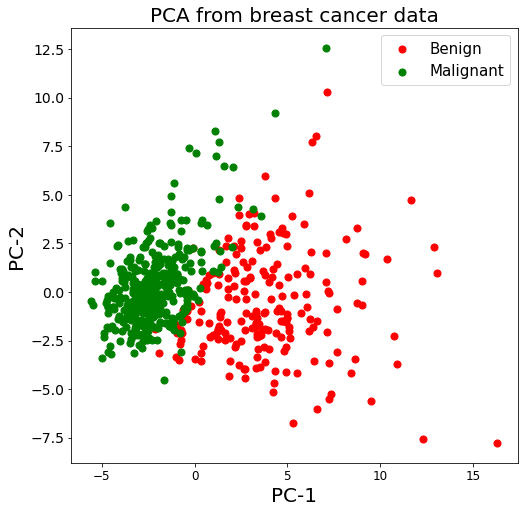

In [28]:
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC-1', fontsize=20)
plt.ylabel('PC-2', fontsize=20)
plt.title('PCA from breast cancer data', fontsize=20)
target_color = [('Benign', 'r'), ('Malignant', 'g')]
for target, color in target_color:
    list_idx = df['label_name'] == target
    plt.scatter(df_pca.loc[list_idx, 'pc1'],
               df_pca.loc[list_idx, 'pc2'],
               c=color, s=50
    ) 
plt.legend(['Benign', 'Malignant'], prop={'size':15})
plt.show()

In [29]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

X shape after PCA: (569, 10)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596129,-0.035472,0.987938,0.256994
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105202,-0.108629
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393920,0.520879
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567937,0.223081,-0.280239,-0.542041,-0.089298
568,-5.475243,-0.670637,1.490443,-2.299157,-0.184703,1.617837,1.698951,1.046353,0.374099,-0.047729


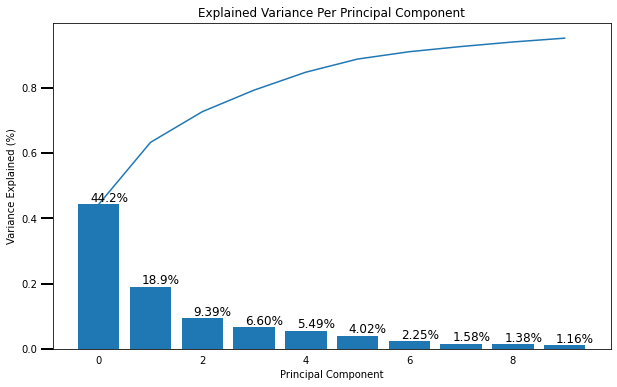

In [32]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print('X shape after PCA:', X_pca.shape)

df_pca = pd.DataFrame(X_pca, 
            columns=['pc' + str(i) for i in range(1, pca.n_components+1)])
display(df_pca.tail())
scree_plot(pca)

## K-Means Clustering

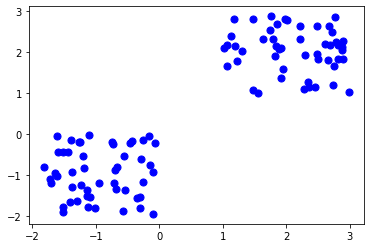

In [34]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

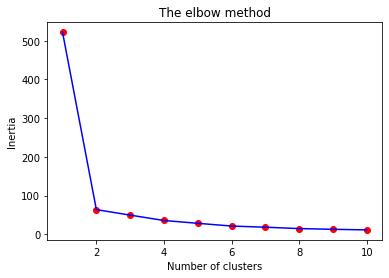

In [35]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, c='b')
plt.scatter(range(1,11), inertia, c='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares
plt.show()

Centroids:
 [[ 2.11851194  2.04139226]
 [-0.94793198 -0.9480509 ]]


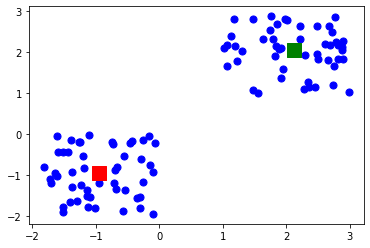

In [37]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print('Centroids:\n', kmeans.cluster_centers_)

plt.scatter(X[:, 0], X[:,1], s=50, c='b')
plt.scatter(kmeans.cluster_centers_[0, 0], 
            kmeans.cluster_centers_[0,1], 
            s=200, c='g', marker='s')
plt.scatter(kmeans.cluster_centers_[1, 0], 
            kmeans.cluster_centers_[1,1], 
            s=200, c='r', marker='s')

In [40]:
data = pd.read_csv('Customers.csv')
print('dataset shape:', data.shape)

dataset shape: (440, 8)


In [41]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#convert to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


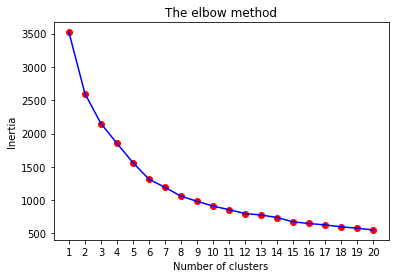

In [45]:
inertia = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df.values)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 21), inertia, c='b')
plt.scatter(range(1,21), inertia, c='r')
plt.xticks(range(1,21))
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') #within cluster sum of squares
plt.show()

In [46]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df.values)
data['cluster']= kmeans.predict(scaled_df.values)

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


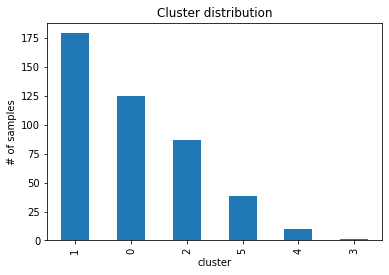

In [47]:
data.cluster.value_counts().plot(kind='bar')
plt.xlabel('cluster')
plt.ylabel('# of samples')
plt.title('Cluster distribution')
plt.show()

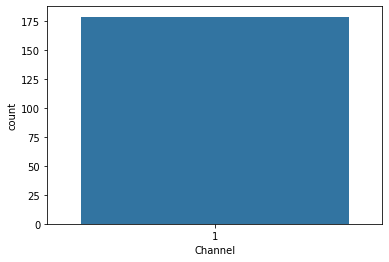

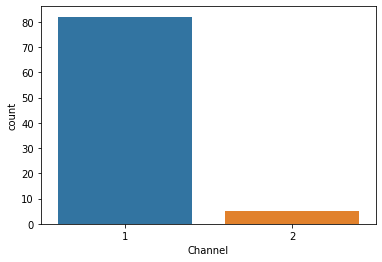

In [52]:
cluster_1 = data[data.cluster==1]
cluster_2 = data[data.cluster==2]

sns.countplot(cluster_1.Channel)
plt.show()
sns.countplot(cluster_2.Channel)
plt.show()

## Model Serialization


In [54]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

encoder = LabelEncoder()
enc_weather = encoder.fit_transform(weather)
enc_temp = encoder.fit_transform(temp)
label = encoder.fit_transform(play)
features = list(zip(enc_weather, enc_temp))

model = GaussianNB()
model.fit(features, label)

#save model to local computer
filename = '../models/gaussian_nb.pkl'
pickle.dump(model, open(filename, 'wb')) #wb --> write binary



In [55]:
model.predict([[0,2]])

array([1], dtype=int64)

In [1]:
import pickle

In [3]:
#load model
my_model = pickle.load(open('../models/gaussian_nb.pkl', 'rb')) #read binary

In [4]:
my_model.predict([[0,2]])

array([1], dtype=int64)